In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.stats import sem as sem

In [3]:
from maystats import *

In [250]:
test_parameter_index = 1
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )
params = np.delete(params, test_parameter_index, 1)
del ps_mean[test_parameter_index]

mnu_scale = 1
omegam_scale = 1
As_scale = 1
PS_scale = 1e-9
scale_vec = np.array([mnu_scale,omegam_scale,As_scale])

gp_list = []
print(params.shape)
for test_ell_bin in range(len(ell)):
    X = np.array([ params[0] / mnu_scale, 
                   params[1] / omegam_scale, 
                   params[2] / As_scale])
    X = np.atleast_2d(X).T
    y = np.array([np.mean(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_mean]) / PS_scale
    dy = np.array([sem(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_mean]) / PS_scale
    kernel =  C( 1.0, (1e-3, 1e3))  * RBF( np.ones(3), (1e-5, 1e5))
    gp = GaussianProcessRegressor(kernel=kernel, 
                                  alpha=(dy)**2, 
                                  n_restarts_optimizer=10,
                                  normalize_y=True)
    gp.fit(X, y)
    gp_list.append(gp)
    
def get_PS( x ):
    y_pred_list = []
    sigma_list = []
    for gp in gp_list:
        y_pred, sigma = gp.predict( np.atleast_2d(x)/scale_vec, return_std=True)
        y_pred_list.append(y_pred[0])
        sigma_list.append(sigma[0])
    
    return y_pred_list, sigma_list

params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )


ys, sigs = get_PS( params.T[test_parameter_index] )
fid_ys = 1e-9 * np.array(ys)
fid_sigs = 1e-9 * np.array(sigs)

(3, 100)


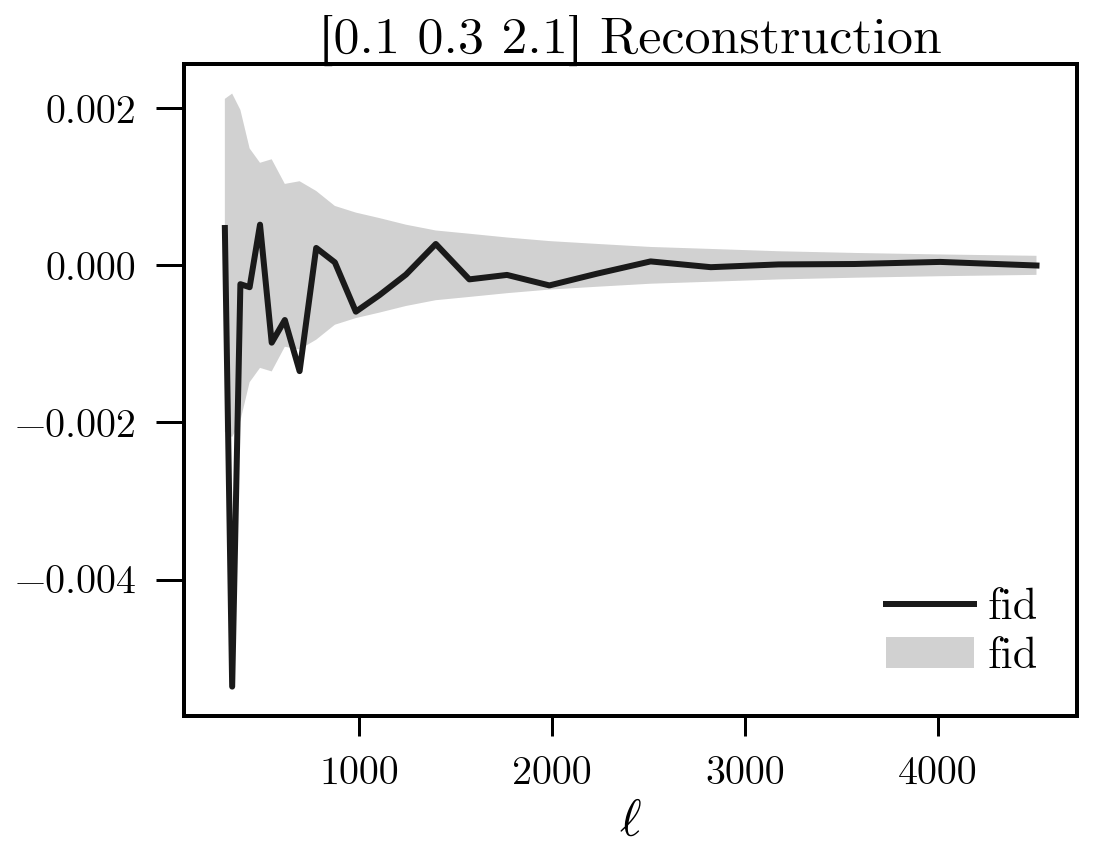

In [251]:

plt.fill(np.concatenate([ell, ell[::-1]]),
         np.concatenate([- 1.9600 * fid_sigs/fid_ys ,
                        ( 1.9600 * fid_sigs/fid_ys)[::-1]]),
         alpha=.2, fc=default_color_list[0], ec='None', label='fid')


real_ps = np.mean(ps_mean[test_parameter_index],axis=0)
plt.title(str(params.T[test_parameter_index]))
plt.plot(  ell, (fid_ys-real_ps)/real_ps, label='fid' )

plt.title(str(params.T[test_parameter_index]) + ' Reconstruction')
plt.xlabel(r'$\ell$')
plt.legend()

# use ell

In [113]:
test_parameter_index = 1
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )
params = np.delete(params, test_parameter_index, 1)
del ps_mean[test_parameter_index]

In [114]:
ps_mean[0].shape

(9999, 24)

In [115]:

mnu_scale = 1
omegam_scale = 1
As_scale = 1
PS_scale = 1e-9
scale_vec = np.array([mnu_scale,omegam_scale,As_scale])

# gp_list = []
X_list = []
y_list = []
dy_list = []

for test_ell_bin in range(len(ell)):
    X = np.array([ params[0] / mnu_scale, 
                   params[1] / omegam_scale, 
                   params[2] / As_scale,
                   ell[test_ell_bin] * np.ones(len(params[0]))])
    X = np.atleast_2d(X).T
    y = np.array([np.mean(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_mean]) / PS_scale
    dy = np.array([sem(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_mean]) / PS_scale
    X_list.append(X)
    y_list.append(y)
    dy_list.append(dy)
    
dy = np.hstack(dy_list)
y = np.hstack(y_list)
X = np.vstack(X_list)

In [117]:
kernel =  C( 1.0, (1e-3, 1e3))  * RBF( np.ones(4), (1e-5, 1e5))
gp = GaussianProcessRegressor(kernel=kernel, 
                                  alpha=(dy)**2, 
                                  n_restarts_optimizer=10,
                                  normalize_y=True)
gp.fit(X, y)
gp_list.append(gp)

In [121]:

params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )

input_stack = np.vstack( [np.array([0.1, 0.3, 2.1, ell_]) for ell_ in range(24)] )

array([0.1, 0.3, 2.1])

In [125]:
ys, sigma = gp.predict( input_stack , return_std=True)
mega_ys = 1e-9 * np.array(ys)
mega_sigs = 1e-9 * np.array(sigma)

(-0.01, 0.01)

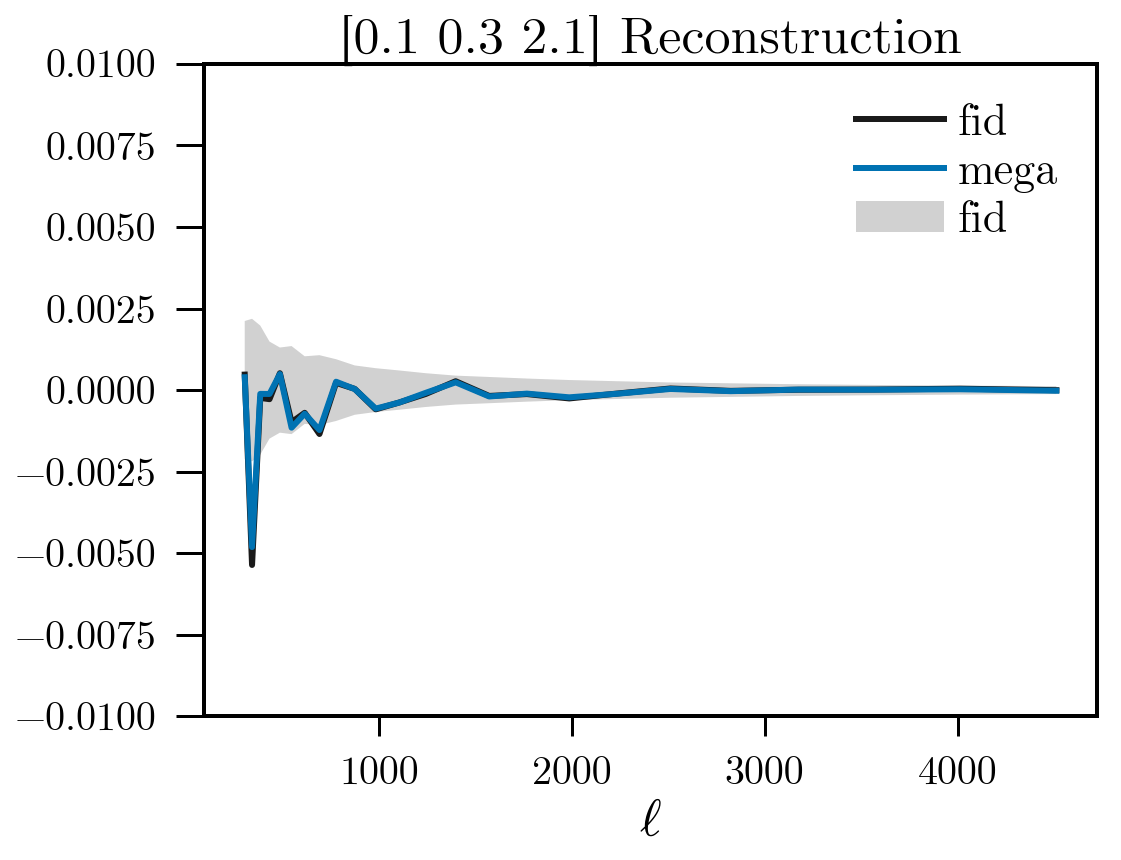

In [132]:

plt.fill(np.concatenate([ell, ell[::-1]]),
         np.concatenate([- 1.9600 * fid_sigs/fid_ys ,
                        ( 1.9600 * fid_sigs/fid_ys)[::-1]]),
         alpha=.2, fc=default_color_list[0], ec='None', label='fid')


real_ps = np.mean(ps_mean[test_parameter_index],axis=0)
plt.title(str(params.T[test_parameter_index]))
plt.plot(  ell, (fid_ys-real_ps)/real_ps, label='fid' )

plt.plot(  ell, (mega_ys-real_ps)/real_ps, label='mega' )

plt.title(str(params.T[test_parameter_index]) + ' Reconstruction')
plt.xlabel(r'$\ell$')
plt.legend()
plt.ylim(-0.01,0.01)

# Correlated Redshifts

In [252]:
test_parameter_index = 1
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )
params = np.delete(params, test_parameter_index, 1)
del ps_mean[test_parameter_index]

In [253]:
ell_2, ps_mean_2 = get_real_list( 'PS', noisy='KN', redshift='10',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )
del ps_mean_2[test_parameter_index]

In [254]:
test_parameter_index = 1
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )
params = np.delete(params, test_parameter_index, 1)
del ps_mean[test_parameter_index]

mnu_scale = 1
omegam_scale = 1
As_scale = 1
PS_scale = 1e-9
scale_vec = np.array([mnu_scale,omegam_scale,As_scale])

In [255]:
gp_list = []
print(params.shape)
for test_ell_bin in range(len(ell)):
    y_2 = np.array([np.mean(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_mean_2]) / PS_scale
    X = np.array([ params[0] / mnu_scale, 
                   params[1] / omegam_scale, 
                   params[2] / As_scale,
                   y_2])
    X = np.atleast_2d(X).T
    y = np.array([np.mean(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_mean]) / PS_scale
    dy = np.array([sem(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_mean]) / PS_scale
    kernel =  C( 1.0, (1e-3, 1e3))  * RBF( np.ones(4), (1e-5, 1e5))
    gp = GaussianProcessRegressor(kernel=kernel, 
                                  alpha=(dy)**2, 
                                  n_restarts_optimizer=10,
                                  normalize_y=True)
    gp.fit(X, y)
    gp_list.append(gp)
    

(3, 100)


In [256]:

def get_PS( x ):
    y_pred_list = []
    sigma_list = []
    for gp, y_2_inst in zip(gp_list, y_2):
        test_inp = np.atleast_2d( [x[0], x[1], x[2], y_2_inst] )
        y_pred, sigma = gp.predict( test_inp, return_std=True)
        y_pred_list.append(y_pred[0])
        sigma_list.append(sigma[0])
    
    return y_pred_list, sigma_list

params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )

ell, ps_mean_2 = get_real_list( 'PS', noisy='KN', redshift='10',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )

y_2 = np.array([np.mean(ps_temp,axis=0) for ps_temp in ps_mean_2]) / PS_scale
y_2 = y_2[test_parameter_index]


ys, sigs = get_PS( params.T[test_parameter_index] )
z_ys = 1e-9 * np.array(ys)
z_sigs = 1e-9 * np.array(sigs)

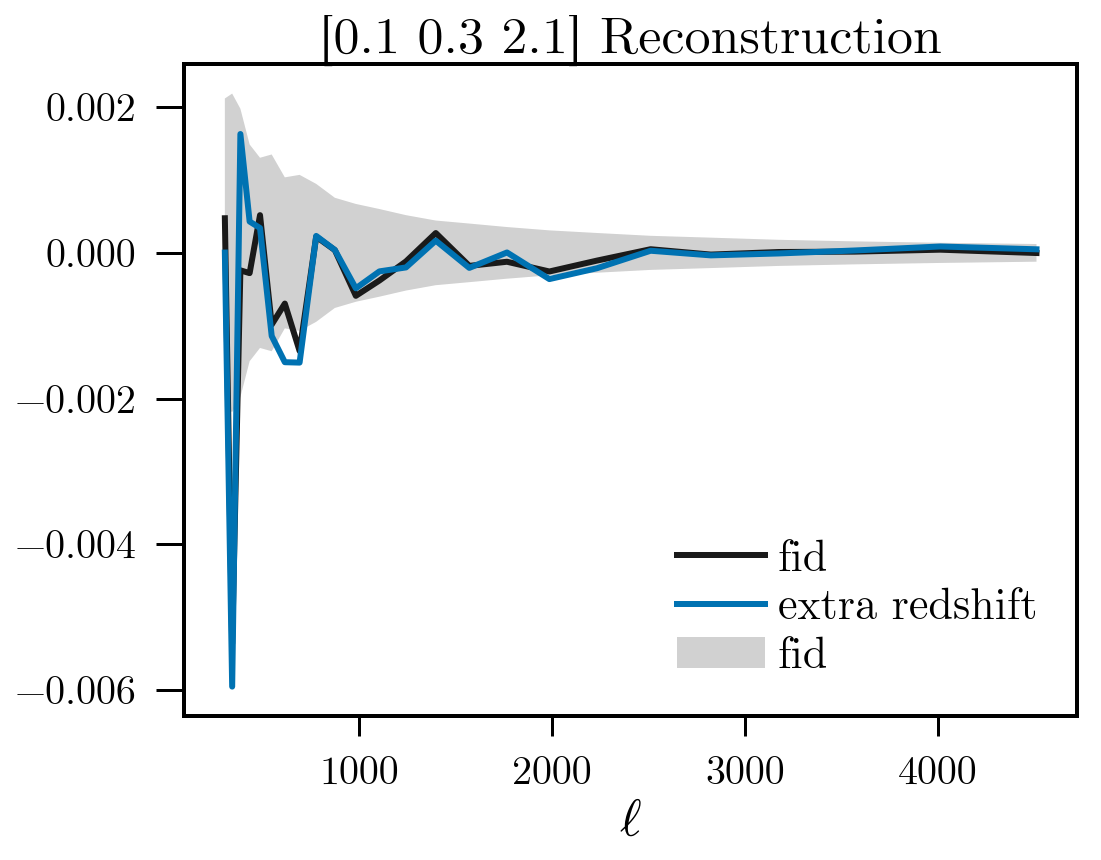

In [258]:

plt.fill(np.concatenate([ell, ell[::-1]]),
         np.concatenate([- 1.9600 * fid_sigs/fid_ys ,
                        ( 1.9600 * fid_sigs/fid_ys)[::-1]]),
         alpha=.2, fc=default_color_list[0], ec='None', label='fid')


real_ps = np.mean(ps_mean[test_parameter_index],axis=0)
plt.title(str(params.T[test_parameter_index]))
plt.plot(  ell, (fid_ys-real_ps)/real_ps, label='fid' )


plt.plot(  ell, (z_ys-real_ps)/real_ps, label='extra redshift' )

plt.title(str(params.T[test_parameter_index]) + ' Reconstruction')
plt.xlabel(r'$\ell$')
plt.legend()

# Redshift as Input

First, we create a stack of redshifts, appending each but ignoring the `test_parameter_index`.

In [304]:
test_parameter_index = 1

params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
params = np.delete(params, test_parameter_index, 1)
params_list = []

ell = []
ps_real = []
redshifts = ['05', '10', '15', '20', '25']
red_dict = {'05':0.5, '10':1.0, '15':1.5, '20':2.0, '25':2.5}
redshift_list = []

for redshift in redshifts:
    ell_, ps_real_ = get_real_list( 'PS', noisy='KN', redshift=redshift,  
                                   bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )
    del ps_real_[test_parameter_index]
    redshift_list.append( red_dict[redshift] * np.ones(len(params.T)) )
    ell.append(ell_)
    ps_real.append(ps_real_)
    params_list.append(params)
    
ell = ell[-1]
ps_real = np.vstack(ps_real)
redshift_list = np.hstack(redshift_list)
params = np.hstack(params_list)

In [306]:
PS_scale = 1e-9

gp_list = []
print(params.shape)
for test_ell_bin in range(len(ell)):
    X = np.array([ params[0], 
                   params[1], 
                   params[2],
                   redshift_list])
    X = np.atleast_2d(X).T
    y = np.array([np.mean(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_real]) / PS_scale
    dy = np.array([sem(ps_temp,axis=0)[test_ell_bin] for ps_temp in ps_real]) / PS_scale
    kernel =  C( 1.0, (1e-3, 1e3))  * RBF( np.ones(4), (1e-5, 1e5))
    gp = GaussianProcessRegressor(kernel=kernel, 
                                  alpha=(dy)**2, 
                                  n_restarts_optimizer=10,
                                  normalize_y=True)
    gp.fit(X, y)
    gp_list.append(gp)

(3, 500)


/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00052822,  0.00143802, -0.0015981 ,  0.00170885, -0.01230843]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 96, 'nit': 38, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.0008071 ,  0.0017767 , -0.00142506,  0.00239989, -0.01137395]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 88, 'nit': 25, 'warnflag': 2}
  " state: %s" % convergence_dict)


In [310]:

    
def get_PS( x ):
    y_pred_list = []
    sigma_list = []
    for gp in gp_list:
        y_pred, sigma = gp.predict( np.atleast_2d(x), return_std=True)
        y_pred_list.append(y_pred[0])
        sigma_list.append(sigma[0])
    
    return y_pred_list, sigma_list


In [311]:

params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='KN', redshift='05',  
                               bin_min=300, bin_max=5000, smoothing='1.00', binscale='log' )
params.T[test_parameter_index]

array([0.1, 0.3, 2.1])

/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


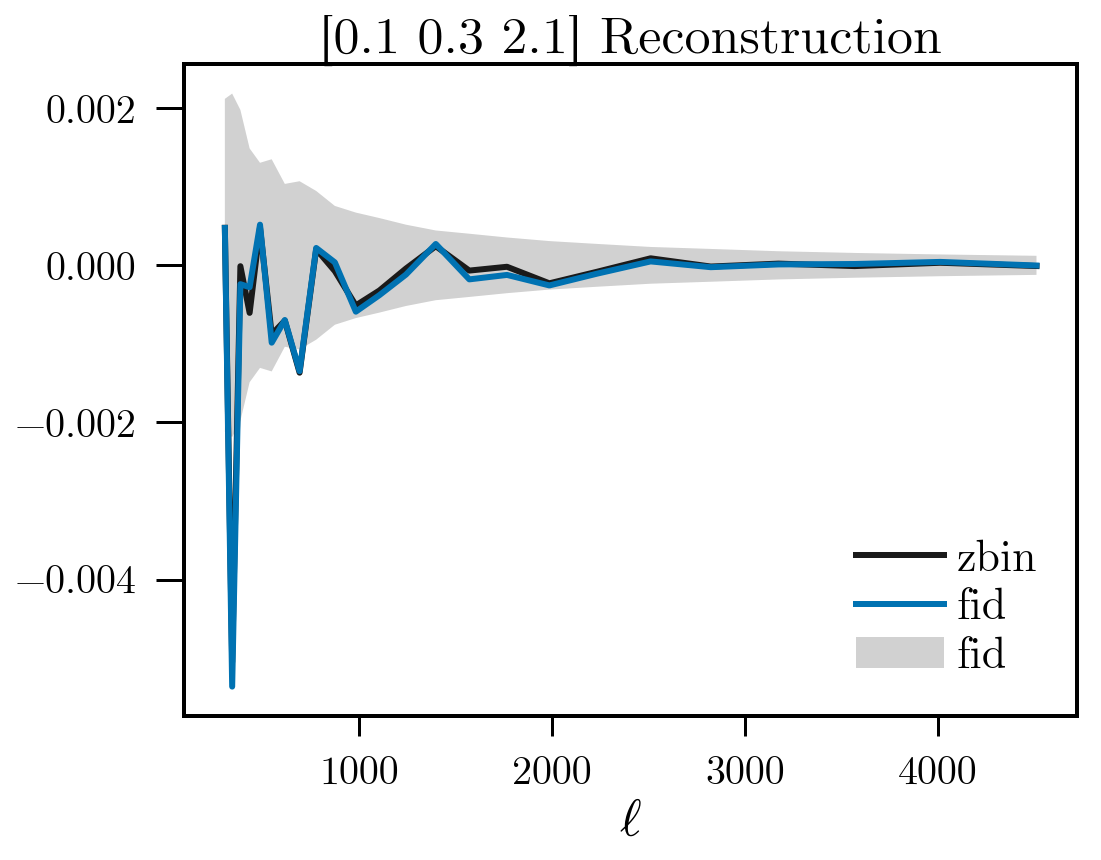

In [313]:


ys, sigs = get_PS( np.array([0.1,0.3,2.1,0.5]) )
zb_ys = 1e-9 * np.array(ys)
zb_sigs = 1e-9 * np.array(sigs)


plt.fill(np.concatenate([ell, ell[::-1]]),
         np.concatenate([- 1.9600 * fid_sigs/fid_ys ,
                        ( 1.9600 * fid_sigs/fid_ys)[::-1]]),
         alpha=.2, fc=default_color_list[0], ec='None', label='fid')


real_ps = np.mean(ps_mean[test_parameter_index],axis=0)
plt.title(str(params.T[test_parameter_index]))
plt.plot(  ell, (zb_ys-real_ps)/real_ps, label='zbin' )
plt.plot(  ell, (fid_ys-real_ps)/real_ps, label='fid' )

plt.title(str(params.T[test_parameter_index]) + ' Reconstruction')
plt.xlabel(r'$\ell$')
plt.legend()